<a href="https://colab.research.google.com/drive/1xMXlvtdf49Y2um6AKk3gv1Yzo_dwlb5t" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Plotando um Scatter Plot com brasão dos times BR 23 - 10ª Rodada

 Vamos criar um gráfico de dispersão dos times xG(Expected Goals) e xGA(Expected Goals Against), mas com os logotipos dos clubes representando cada um.

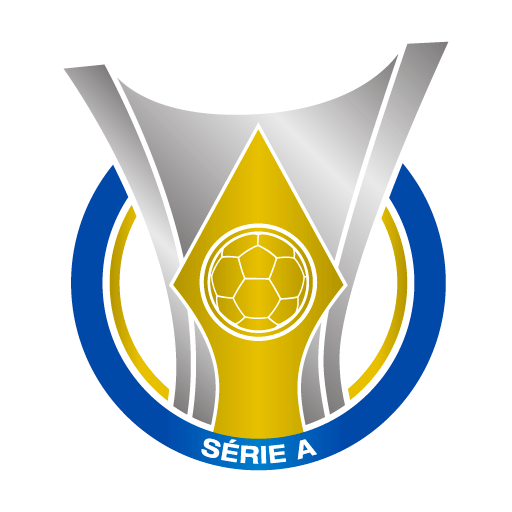

In [ ]:
#Importando as Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Conectando o Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Lendo o arquivo csv
df = pd.read_csv('/content/drive/MyDrive/data_sets/futebol/scatter_plot/10_rodada.csv' , sep=';')
df.head()

,Equipe,xG,xGA,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,América Mineiro,12.8,17.4,NaN,NaN,NaN,NaN,NaN
1,Athletico,11.6,11.4,NaN,NaN,NaN,NaN,NaN
2,Atlético Mineiro,14.7,9.8,NaN,NaN,NaN,NaN,NaN
3,Bahia,12.0,12.7,NaN,NaN,NaN,NaN,NaN
4,Botafogo,16.8,11.4,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Criando a coluna com o nome do brasão
df['path'] = df['Equipe'] + '.png'
df['Equipe']

0      América Mineiro
1            Athletico
2     Atlético Mineiro
3                Bahia
4             Botafogo
5           Bragantino
6          Corinthians
7             Coritiba
8             Cruzeiro
9               Cuiabá
10            Flamengo
11          Fluminense
12           Fortaleza
13               Goiás
14              Gremio
15       Internacional
16           Palmeiras
17              Santos
18           São Paulo
19       Vasco da Gama
Name: Equipe, dtype: object

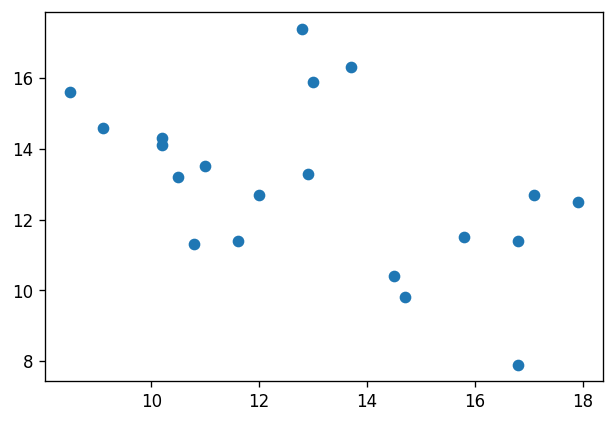

In [ ]:
#Plotar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(df['xG'], df['xGA'])

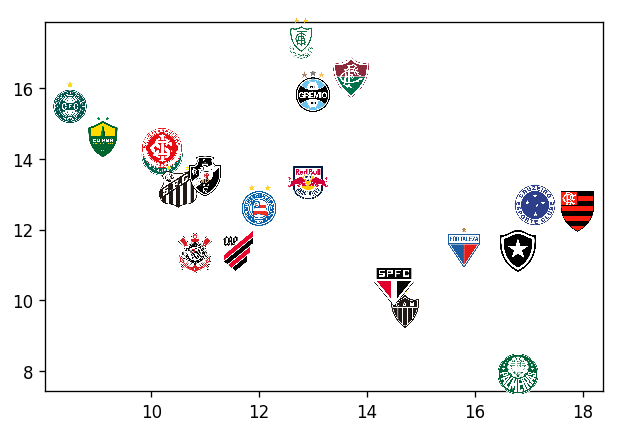

In [ ]:
#Adcionando os brasões ao ploter
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(df['xG'], df['xGA'], color='white')
img ='/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/' #local onde estão os brasões
def getImage(path):
    return OffsetImage(plt.imread(img + path), zoom=.05, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['xG'], row['xGA']), frameon=False)
    ax.add_artist(ab)

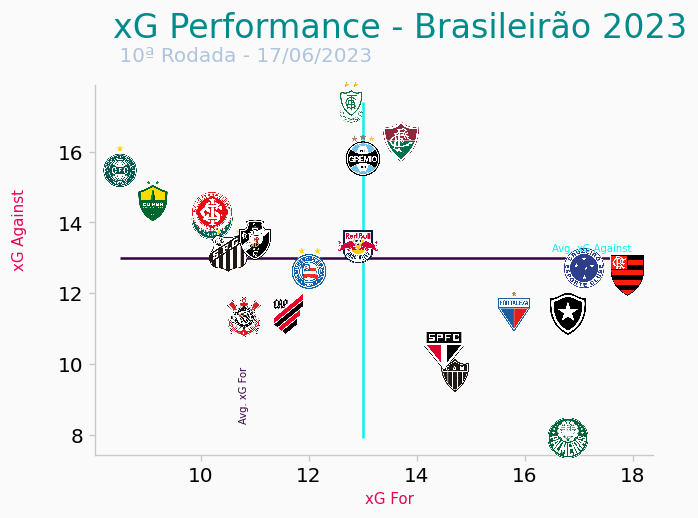

In [ ]:
#Personalizando o gráfico
# Definir fonte e cor de fundo
plt.rcParams.update({'font.monospace':'Courier'})
bgcol = '#fafafa'

# Create initial plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(df['xG'], df['xGA'], c=bgcol)

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
img ='/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/' #local onde estão os brasões
def getImage(path):
    return OffsetImage(plt.imread(img + path), zoom=.05, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['xG'], row['xGA']), frameon=False)
    ax.add_artist(ab)

# Add average lines
plt.hlines(df['xGA'].mean(), df['xG'].min(), df['xG'].max(), color='#340040')
plt.vlines(df['xG'].mean(), df['xGA'].min(), df['xGA'].max(), color='#07F2F2')

# Text

## Title & comment
fig.text(.15,.98,'xG Performance - Brasileirão 2023' ,size=20, color='#008B8B')
fig.text(.15,.93,' 10ª Rodada - 17/06/2023', size=12, color='#B0C4DE')

## Avg line explanation
fig.text(.01,.50,'xG Against', size=9, color='#e90052',rotation=90)
fig.text(.50,0.01,'xG For', size=9, color='#e90052')

## Axes titles
fig.text(.76,.535,'Avg. xG Against', size=6, color='#07F2F2')
fig.text(.325,.18,'Avg. xG For', size=6, color='#340040',rotation=90)

## Save plot
plt.savefig('xGChart.png', dpi=1200, bbox_inches = "tight")

# Análise

Já estamos na 10ª Rodada. Uma rodada com 6 empates marcada pela demissão de Coudet do Atlético Mineiro que já trouxe o Multi Campeão Felipão. Este gráfico tem mostrado uma regularidade, o Palmeiras segue com números excelentes de xG e xGA. A chegada de Jorge Sampaole fez muito bem ao Flamengo.